In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	20329953.6023

Best Fitness:	7674787.9229
Solution:	100.0000
Diff:		7674687.9229

[0:19:36][----------] 1.96% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	50326037.0928

Best Fitness:	21019653.1077
Solution:	100.0000
Diff:		21019553.1077

[0:38:28][----------] 3.92% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	35428620.6521

Best Fitness:	13279737.4591
Solution:	100.0000
Diff:		13279637.4591

[0:55:17][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	23707478.1424

Best Fitness:	9704048.8302
Solution:	100.0000
Diff:		9703948.8302

[1:12:25][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	63775530.5131

Best Fitness:	32379325.6536
Solution:	100.0000
Diff:		32379225.6536

[1:29:04][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	34932723.0281

Best Fitness:	16544645.0392
Solution:	100.0000
Diff:		16544545.0392

[1:45:01][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	52962172.3059

Best Fitness:	16602745.5335
Solution:	100.0000
Diff:		16602645.5335

[2:01:24][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	47124330.7834

Best Fitness:	16782115.7044
Solution:	100.0000
Diff:		16782015.7044

[2:17:12][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	26718899.1468

Best Fitness:	14678464.2296
Solution:	100.0000
Diff:		14678364.2296

[2:32:53][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	27319875.7705

Best Fitness:	14008701.0326
Solution:	100.0000
Diff:		14008601.0326

[2:47:00][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	27074137.1560

Best Fitness:	6470733.5666
Solution:	100.0000
Diff:		6470633.5666

[3:01:04][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	24775893.2316

Best Fitness:	11400094.2827
Solution:	100.0000
Diff:		11399994.2827

[3:14:52][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	35058366.2451

Best Fitness:	17219663.8494
Solution:	100.0000
Diff:		17219563.8494

[3:28:10][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	34510740.2882

Best Fitness:	12716003.3046
Solution:	100.0000
Diff:		12715903.3046

[3:41:13][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	36364446.1357

Best Fitness:	12674202.3997
Solution:	100.0000
Diff:		12674102.3997

[3:54:04][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	29185637.2781

Best Fitness:	12493363.2704
Solution:	100.0000
Diff:		12493263.2704

[4:07:03][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	55956790.7725

Best Fitness:	25394651.4288
Solution:	100.0000
Diff:		25394551.4288

[4:20:00][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	70579878.7145

Best Fitness:	26614356.3847
Solution:	100.0000
Diff:		26614256.3847

[4:33:10][####------] 35.29% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	29975766.6037

Best Fitness:	13136295.3115
Solution:	100.0000
Diff:		13136195.3115

[4:46:11][####------] 37.25% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	28316983.0197

Best Fitness:	17323669.9971
Solution:	100.0000
Diff:		17323569.9971

[4:58:25][####------] 39.22% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	29350161.8720

Best Fitness:	15962448.5472
Solution:	100.0000
Diff:		15962348.5472

[5:09:39][####------] 41.18% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	27603451.5426

Best Fitness:	9314838.8349
Solution:	100.0000
Diff:		9314738.8349

[5:20:10][####------] 43.14% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	22236994.6051

Best Fitness:	9128085.9248
Solution:	100.0000
Diff:		9127985.9248

[5:30:02][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	37595168.7100

Best Fitness:	13215184.0169
Solution:	100.0000
Diff:		13215084.0169

[5:39:32][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	26544913.4057

Best Fitness:	12204552.8250
Solution:	100.0000
Diff:		12204452.8250

[5:49:12][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	26383028.1951

Best Fitness:	11347202.2517
Solution:	100.0000
Diff:		11347102.2517

[5:58:24][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	40002367.0203

Best Fitness:	15893770.5561
Solution:	100.0000
Diff:		15893670.5561

[6:07:09][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	84854409.7073

Best Fitness:	29888379.0182
Solution:	100.0000
Diff:		29888279.0182

[6:15:49][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	30533084.9139

Best Fitness:	13791245.4681
Solution:	100.0000
Diff:		13791145.4681

[6:24:24][######----] 56.86% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	53163450.5101

Best Fitness:	13375737.0282
Solution:	100.0000
Diff:		13375637.0282

[6:32:16][######----] 58.82% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	28412020.0397

Best Fitness:	13933175.6567
Solution:	100.0000
Diff:		13933075.6567

[6:39:37][######----] 60.78% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	32251391.4202

Best Fitness:	13273918.3175
Solution:	100.0000
Diff:		13273818.3175

[6:46:39][######----] 62.75% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	34551418.6266

Best Fitness:	17008884.4946
Solution:	100.0000
Diff:		17008784.4946

[6:53:15][######----] 64.71% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	32419748.1161

Best Fitness:	11326361.9758
Solution:	100.0000
Diff:		11326261.9758

[6:59:25][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	21635306.2127

Best Fitness:	9564118.7823
Solution:	100.0000
Diff:		9564018.7823

[7:05:35][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	49843008.7152

Best Fitness:	18975336.6388
Solution:	100.0000
Diff:		18975236.6388

[7:11:42][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	38494740.8619

Best Fitness:	11467787.5993
Solution:	100.0000
Diff:		11467687.5993

[7:17:50][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	47109019.2653

Best Fitness:	18095694.9864
Solution:	100.0000
Diff:		18095594.9864

[7:23:58][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	28211857.6261

Best Fitness:	12184339.9427
Solution:	100.0000
Diff:		12184239.9427

[7:30:05][########--] 76.47% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	31562997.7946

Best Fitness:	10103640.3188
Solution:	100.0000
Diff:		10103540.3188

[7:36:11][########--] 78.43% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	35993262.7851

Best Fitness:	16218781.9883
Solution:	100.0000
Diff:		16218681.9883

[7:42:18][########--] 80.39% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	63591481.5889

Best Fitness:	25928635.2439
Solution:	100.0000
Diff:		25928535.2439

[7:47:45][########--] 82.35% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	35612320.0078

Best Fitness:	13117969.3709
Solution:	100.0000
Diff:		13117869.3709

[7:53:07][########--] 84.31% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	38352973.5728

Best Fitness:	18200548.7211
Solution:	100.0000
Diff:		18200448.7211

[7:58:26][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	46441990.3317

Best Fitness:	11750057.5414
Solution:	100.0000
Diff:		11749957.5414

[8:03:45][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	32998304.6952

Best Fitness:	12401426.9330
Solution:	100.0000
Diff:		12401326.9330

[8:09:02][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	47130351.6341

Best Fitness:	20763256.2805
Solution:	100.0000
Diff:		20763156.2805

[8:14:21][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	36483701.0319

Best Fitness:	15953850.3998
Solution:	100.0000
Diff:		15953750.3998

[8:19:41][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	51412417.3123

Best Fitness:	17864030.9809
Solution:	100.0000
Diff:		17863930.9809

[8:25:01][##########] 96.08% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	45858241.2023

Best Fitness:	15885178.8957
Solution:	100.0000
Diff:		15885078.8957

[8:30:21][##########] 98.04% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	31312047.4341

Best Fitness:	11890743.2691
Solution:	100.0000
Diff:		11890643.2691

[8:35:57][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

8:35:57

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
492,3.687906e+07,2.747603e+07,1.855219e+07,2.649917e+07,3.866401e+07,2.509816e+07,3.536801e+07,3.398920e+07,2.458534e+07,2.857436e+07,...,4.630086e+07,3.649862e+07,4.214488e+07,4.655117e+07,3.736305e+07,4.032682e+07,5.337745e+07,3.698712e+07,1.977101e+07,50
493,3.687906e+07,2.747603e+07,1.855219e+07,2.649917e+07,3.866401e+07,2.509816e+07,3.536801e+07,3.398920e+07,2.458534e+07,2.857436e+07,...,4.630086e+07,3.649862e+07,4.214488e+07,4.655117e+07,3.736305e+07,4.032682e+07,5.337745e+07,3.698712e+07,1.977101e+07,50
494,3.687906e+07,2.747603e+07,1.855219e+07,2.649917e+07,3.866401e+07,2.509816e+07,3.536801e+07,3.398920e+07,2.458534e+07,2.857436e+07,...,4.630086e+07,3.649862e+07,4.214488e+07,4.655117e+07,3.736305e+07,4.032682e+07,2.665446e+07,3.698712e+07,1.977101e+07,50
495,3.687906e+07,2.747603e+07,1.855219e+07,2.649917e+07,3.866401e+07,2.509816e+07,3.536801e+07,3.398920e+07,2.458534e+07,2.857436e+07,...,4.630086e+07,3.649862e+07,4.214488e+07,4.655117e+07,3.736305e+07,4.032682e+07,2.665446e+07,3.698712e+07,1.977101e+07,50
496,3.687906e+07,2.747603e+07,1.855219e+07,2.649917e+07,3.866401e+07,2.509816e+07,3.536801e+07,3.398920e+07,2.458534e+07,2.857436e+07,...,4.630086e+07,3.649862e+07,4.214488e+07,4.655117e+07,3.736305e+07,4.032682e+07,2.665446e+07,3.698712e+07,1.977101e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 7674687.922914944

Best error for run 1: 21019553.107730843

Best error for run 2: 13279637.459106803

Best error for run 3: 9703948.830191048

Best error for run 4: 32379225.653616786

Best error for run 5: 16544545.039238028

Best error for run 6: 16602645.533533076

Best error for run 7: 16782015.70437678

Best error for run 8: 14678364.229632983

Best error for run 9: 14008601.03256615

Best error for run 10: 6470633.56664031

Best error for run 11: 11399994.282742703

Best error for run 12: 17219563.84938797

Best error for run 13: 12715903.30462529

Best error for run 14: 12674102.399692336

Best error for run 15: 12493263.270425446

Best error for run 16: 25394551.428844497

Best error for run 17: 26614256.384695448

Best error for run 18: 13136195.311454913

Best error for run 19: 17323569.99707845

Best error for run 20: 15962348.547247894

Best error for run 21: 9314738.834860478

Best error for run 22: 9127985.92480106

Best error for run 23: 13215084.01689767

Best error for run 24: 12204452.82496033

Best error for run 25: 11347102.251730612

Best error for run 26: 15893670.556054756

Best error for run 27: 29888279.018229365

Best error for run 28: 13791145.468129031

Best error for run 29: 13375637.028205615

Best error for run 30: 13933075.656715408

Best error for run 31: 13273818.317501388

Best error for run 32: 17008784.494648397

Best error for run 33: 11326261.975784346

Best error for run 34: 9564018.782273155

Best error for run 35: 18975236.63882666

Best error for run 36: 11467687.599253448

Best error for run 37: 18095594.98643794

Best error for run 38: 12184239.9427403

Best error for run 39: 10103540.318760732

Best error for run 40: 16218681.988323644

Best error for run 41: 25928535.243862197

Best error for run 42: 13117869.370936448

Best error for run 43: 18200448.721128777

Best error for run 44: 11749957.541410694

Best error for run 45: 12401326.93298531

Best error for run 46: 20763156.28049089

Best error for run 47: 15953750.399803804

Best error for run 48: 17863930.980909634

Best error for run 49: 15885078.895742105

Best error for run 50: 11890643.269138085

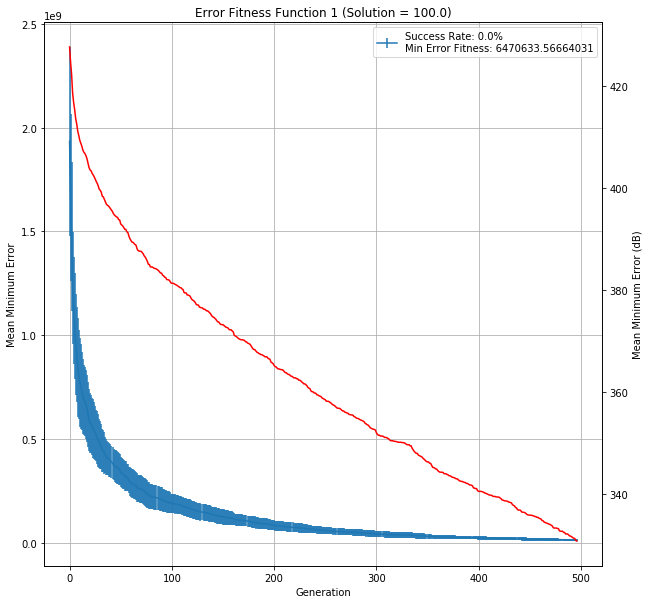

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.5,7.674688e+06,2.101955e+07,1.327964e+07,9.703949e+06,3.237923e+07,1.654455e+07,...,1.174996e+07,1.240133e+07,2.076316e+07,1.595375e+07,1.786393e+07,1.588508e+07,1.189064e+07,1.525767e+07,8:35:57,149700
